In [1]:
import pandas as pd
from langdetect import detect
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# df = pd.read_csv('./buenos_aires/buenos_aires_reviews.csv')
df = pd.read_csv('./brazil/brazil_reviews.csv')

In [14]:
df2 = df[df.comments.str[:34] != "The host canceled this reservation"]
# df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[:12000]
df2

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...
...,...,...,...,...,...,...
12060,322004,455971598,2019-05-20,11634800,Cristiane,Super indico a hospedagem neste apartamento. T...
12061,322004,460537214,2019-05-29,245234712,Ryan,Perfect location! About two blocks away from t...
12062,322004,464370563,2019-06-05,90141796,Julio,In summary:\n\n1) nice location (1 block from ...
12063,322004,469386977,2019-06-14,255971906,Virginia,Estuve ocho noches en el departamento de Jose ...


In [15]:
df3 = df2['comments']
# dfl = df3.str.len()
# dfl.mean(axis = 0)

359.7829819151596

In [16]:
langs = []
for i in df3:
    try:
        langs.append(detect(i))
    except:
        langs.append('Nan')
        continue

In [17]:
dfnew = df2.copy()
dfnew['lang'] = langs
dfnew

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...,en
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...,en
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...,en
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...,en
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...,en
...,...,...,...,...,...,...,...
12060,322004,455971598,2019-05-20,11634800,Cristiane,Super indico a hospedagem neste apartamento. T...,pt
12061,322004,460537214,2019-05-29,245234712,Ryan,Perfect location! About two blocks away from t...,en
12062,322004,464370563,2019-06-05,90141796,Julio,In summary:\n\n1) nice location (1 block from ...,en
12063,322004,469386977,2019-06-14,255971906,Virginia,Estuve ocho noches en el departamento de Jose ...,es


In [18]:
# dfnew = dfnew[(dfnew['lang']=='es') | (dfnew['lang']=='en')]

In [19]:
date = pd.to_datetime(dfnew['date'])
del dfnew['date']
dfnew = pd.concat((dfnew, date), axis = 1, join='inner')
dfnew

,listing_id,id,reviewer_id,reviewer_name,comments,lang,date
0,17878,64852,135370,Tia,This apartment is in a perfect location -- two...,en,2010-07-15
1,17878,76744,10206,Mimi,we had a really great experience staying in Ma...,en,2010-08-11
2,17878,91074,80253,Jan,Staying in Max appartment is like living in a ...,en,2010-09-06
3,17878,137528,230449,Orene,In general very good and reasonable price.\r\n...,en,2010-11-12
4,17878,147594,219338,David,The apt was nice and in a great location only ...,en,2010-12-01
...,...,...,...,...,...,...,...
12060,322004,455971598,11634800,Cristiane,Super indico a hospedagem neste apartamento. T...,pt,2019-05-20
12061,322004,460537214,245234712,Ryan,Perfect location! About two blocks away from t...,en,2019-05-29
12062,322004,464370563,90141796,Julio,In summary:\n\n1) nice location (1 block from ...,en,2019-06-05
12063,322004,469386977,255971906,Virginia,Estuve ocho noches en el departamento de Jose ...,es,2019-06-14


In [20]:
df_es = dfnew[(dfnew['lang']=='es')]
df_en = dfnew[(dfnew['lang']!='en')]

es_data = df_es.groupby([df_es['date'].dt.year.rename('year'), df_es['date'].dt.month.rename('month')]).agg({'count'}).reset_index();
en_data = df_en.groupby([df_en['date'].dt.year.rename('year'), df_en['date'].dt.month.rename('month')]).agg({'count'}).reset_index();

es_data['year-month'] = es_data['year'].map(str) +'-'+ es_data['month'].map(str)
en_data['year-month'] = en_data['year'].map(str) +'-'+ en_data['month'].map(str)
es_data.columns = ['year', 'month',"listing_id", 'id', 'reviewer_id', 'reviewer_name', 'comments', 'lang', 'date', 'year-month']
en_data.columns = ['year', 'month',"listing_id", 'id', 'reviewer_id', 'reviewer_name', 'comments', 'lang', 'date', 'year-month']

es_data['year-month'] = pd.to_datetime(es_data['year-month'], format='%Y-%m')
en_data['year-month'] = pd.to_datetime(en_data['year-month'], format='%Y-%m')

es_data['sum'] = es_data['id'].cumsum()
en_data['sum'] = en_data['id'].cumsum()
es_data
# en_data.to_csv(r'test.csv')

,year,month,listing_id,id,reviewer_id,reviewer_name,comments,lang,date,year-month,sum
0,2011,6,1,1,1,1,1,1,1,2011-06-01,1
1,2011,7,1,1,1,1,1,1,1,2011-07-01,2
2,2011,8,2,2,2,2,2,2,2,2011-08-01,4
3,2011,9,2,2,2,2,2,2,2,2011-09-01,6
4,2011,10,5,5,5,5,5,5,5,2011-10-01,11
...,...,...,...,...,...,...,...,...,...,...,...
96,2019,7,23,23,23,23,23,23,23,2019-07-01,1820
97,2019,8,12,12,12,12,12,12,12,2019-08-01,1832
98,2019,9,24,24,24,24,24,24,24,2019-09-01,1856
99,2019,10,34,34,34,34,34,34,34,2019-10-01,1890


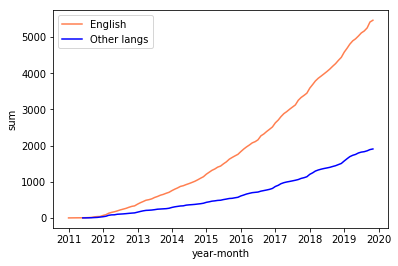

In [21]:
# tips = sns.load_dataset('es_data')
# sns.barplot(x=en_data['year-month'] ,y=en_data['id'], color = 'blue', label = 'en')
# sns.barplot(x=es_data['year-month'] ,y=es_data['id'], color = 'red', label = 'es')



# tips = sns.load_dataset('es_data')
# plt.figure(figsize=(20,6))
ax = sns.lineplot(x=en_data['year-month'] ,y=en_data['sum'], color="coral", label="English")
ax = sns.lineplot(x=es_data['year-month'] ,y=es_data['sum'], color="blue", label="Other langs")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
# plt.show()